In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Menambahkan header
headers = ["parents", "has_nurs", "form", "children", "housing", "finance", "social", "health", "class"]

df = pd.read_csv('nursery/nursery.data', names=headers)

In [3]:
# dataframe
df.head(5)

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [4]:
df.shape

(12960, 9)

In [5]:
# Encode semua kolom
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [6]:
# Split data
X = df.drop(columns=['class'])  # Semua fitur kecuali 'class'
y = df['class']                 # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Training: ", X_train.shape)
print("Data Testing: ", X_test.shape)

Data Training:  (10368, 8)
Data Testing:  (2592, 8)


In [7]:
from sklearn.decomposition import PCA

In [8]:
# Total komponen harus mewakili 85%
pca=PCA(n_components=0.85)

# pca training
Xtrain_pca = pca.fit_transform(X_train)

In [9]:
Xtrain_pca

array([[-1.98497442,  0.71286742, -0.1479329 ,  0.23596993, -0.40607873,
         0.74420362],
       [ 2.02994841,  0.49045403,  2.05978838, -0.35596421, -0.80343002,
        -1.44208082],
       [-1.97577936,  1.04894903,  1.21363214,  0.91990725,  0.76928533,
        -0.1276976 ],
       ...,
       [-0.00725245, -2.05869464,  0.51942085, -0.53214721, -0.38625242,
        -0.62119099],
       [ 1.01648895, -0.35139351,  1.55037133, -0.28039433, -0.76323714,
         0.12321463],
       [-2.0035363 , -0.66447437,  0.19081325, -0.41223272,  0.82697987,
         0.09231828]])

In [10]:
# cek dimensi dataset asli
X_train.shape

(10368, 8)

In [11]:
# cek dimensi dataset pca
Xtrain_pca.shape

(10368, 6)

In [12]:
# data asli sebelum pca
X_train

,parents,has_nurs,form,children,housing,finance,social,health
3334,2,0,2,1,1,0,2,1
12692,0,4,3,3,0,0,0,0
7488,1,0,3,2,1,0,0,2
2901,2,0,1,1,1,0,2,2
3616,2,4,0,2,1,1,1,1
...,...,...,...,...,...,...,...,...
11964,0,0,2,1,2,1,2,2
5191,1,2,0,0,0,0,1,1
5390,1,2,0,3,1,0,1,0
860,2,3,2,3,1,1,2,0


In [13]:
# data setelah pca
Xtrain_pca


array([[-1.98497442,  0.71286742, -0.1479329 ,  0.23596993, -0.40607873,
         0.74420362],
       [ 2.02994841,  0.49045403,  2.05978838, -0.35596421, -0.80343002,
        -1.44208082],
       [-1.97577936,  1.04894903,  1.21363214,  0.91990725,  0.76928533,
        -0.1276976 ],
       ...,
       [-0.00725245, -2.05869464,  0.51942085, -0.53214721, -0.38625242,
        -0.62119099],
       [ 1.01648895, -0.35139351,  1.55037133, -0.28039433, -0.76323714,
         0.12321463],
       [-2.0035363 , -0.66447437,  0.19081325, -0.41223272,  0.82697987,
         0.09231828]])

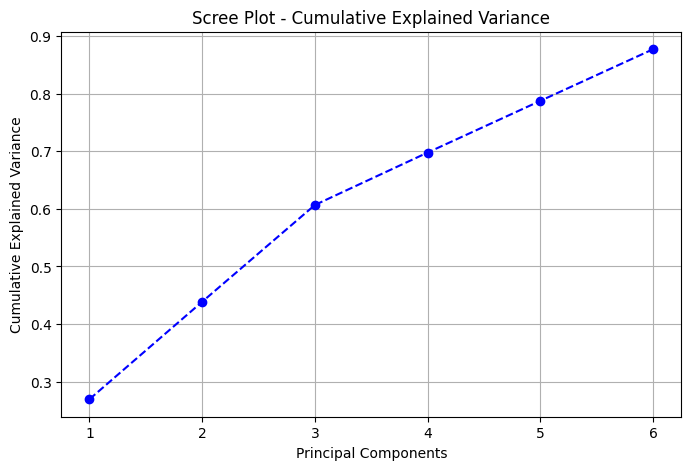

Component 1: 26.92% variance explained
Component 2: 16.93% variance explained
Component 3: 16.82% variance explained
Component 4: 9.11% variance explained
Component 5: 8.98% variance explained
Component 6: 8.97% variance explained


In [14]:
# optimalitas penggunaaan algoritma
# Scree Plot # ini pake tiga dimensi aja cari di modul
plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    np.cumsum(pca.explained_variance_ratio_),
    marker='o',
    linestyle='--',
    color='b'
)
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# variasi algoritmanya
for i, var in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"Component {i}: {var * 100:.2f}% variance explained") # sesuai dengan label algoritmanya # component {i}


Jadi ada 6 komponen PCA untuk mewakili total 87.73% atribut data.